In [15]:
import os
import subprocess
import numpy as np
import pandas as pd
from tqdm import tqdm

In [ ]:

python_script = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py"
seeds = [1, 2, 3]
r_range = np.arange(0.2, 5, 0.2)

save_path = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constrains_input_output_1"
commands = []

for r_v in r_range:
    for seed in seeds:
        cmd = f'/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python {python_script} --seed {seed} --c "{1}"  --r "{r_v}"  --b "{1}" --save_path {save_path}'
        commands.append(cmd)

In [ ]:
for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

In [ ]:
import os

folder_path = "constrains_input_output_1"
dirs = [os.path.join(folder_path,d) for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
commands = []
python_script = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_ouput/main.py"
for dir in dirs:
    for seed in [1]:
        cmd = f'/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python {python_script} --seed {seed} --experiment_path {dir}'
        commands.append(cmd)


In [ ]:
for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

In [ ]:
df = pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/model_results/input_output_1.csv")
df[["c", "r", "b", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)


In [ ]:
data_info = pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constraint_input_output/dataset_info.csv")

In [ ]:
df_grouped = df.groupby("r").model_1_violation.mean().reset_index()
df_grouped = df.groupby("r").model_1_violation.mean().reset_index()

Sharp Max: 0.8
Soft Max:  0.8049


In [16]:

python_script = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py"
seeds = [1, 2]
c_range = np.arange(2, 6, 1)
r_range = np.arange(0.5, 2, 0.5)
b_range = np.arange(1, 4, 1)

save_path = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2"
commands = []

for c_v in c_range:
    for r_v in r_range:
        for b_v in b_range:
            for seed in seeds:
                cmd = f'/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python {python_script} --seed {seed} --c "{c_v}"  --r "{r_v}"  --b "{b_v}" --save_path {save_path}'
                commands.append(cmd)

In [17]:
for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

0it [00:00, ?it/s]


▶️ Running command 1/72:
/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --seed 1 --c "2"  --r "0.5"  --b "1" --save_path /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2

All random seeds set to 1


100%|███████████████████████████████████| 2498/2498 [00:00<00:00, 11744.58it/s]


79
66
Appended new results to '/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2/dataset_info.csv'.


1it [00:06,  6.25s/it]

✅ Completed 1/72


▶️ Running command 2/72:
/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --seed 2 --c "2"  --r "0.5"  --b "1" --save_path /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2

All random seeds set to 2


100%|███████████████████████████████████| 2484/2484 [00:00<00:00, 13365.47it/s]


73
57
Appended new results to '/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2/dataset_info.csv'.


2it [00:08,  3.97s/it]

✅ Completed 2/72


▶️ Running command 3/72:
/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --seed 1 --c "2"  --r "0.5"  --b "2" --save_path /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2

All random seeds set to 1


100%|███████████████████████████████████| 1224/1224 [00:00<00:00, 10340.81it/s]


45
73
69
34
Appended new results to '/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2/dataset_info.csv'.


3it [00:10,  3.21s/it]

✅ Completed 3/72


▶️ Running command 4/72:
/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --seed 2 --c "2"  --r "0.5"  --b "2" --save_path /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2

All random seeds set to 2


100%|███████████████████████████████████| 1218/1218 [00:00<00:00, 17016.91it/s]


50
61
51
44
Appended new results to '/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2/dataset_info.csv'.


4it [00:13,  2.87s/it]

✅ Completed 4/72


▶️ Running command 5/72:
/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --seed 1 --c "2"  --r "0.5"  --b "3" --save_path /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2

All random seeds set to 1


100%|█████████████████████████████████████| 800/800 [00:00<00:00, 12928.03it/s]


40
55
59
61
45
25
Appended new results to '/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2/dataset_info.csv'.


5it [00:15,  2.71s/it]

✅ Completed 5/72


▶️ Running command 6/72:
/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_output_generator_dataset.py --seed 2 --c "2"  --r "0.5"  --b "3" --save_path /Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2



5it [00:16,  3.26s/it]


KeyboardInterrupt: 

In [ ]:
import os

folder_path = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/constr_input_output_2"
dirs = [os.path.join(folder_path,d) for d in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, d))]
commands = []
python_script = "/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/input_ouput/main.py"
for dir in dirs:
    for seed in [1, 2]:
        cmd = f'/opt/homebrew/Caskroom/miniconda/base/envs/drl_env/bin/python {python_script} --seed {seed} --experiment_path {dir}'
        commands.append(cmd)


In [ ]:

for i, cmd in tqdm(enumerate(commands, 1)):
    print(f"\n▶️ Running command {i}/{len(commands)}:\n{cmd}\n")
    
    result = subprocess.run(cmd, shell=True)

    if result.returncode != 0:
        print(f"❌ Command failed with exit code {result.returncode}:")
        print(cmd)
        break
    else:
        print(f"✅ Completed {i}/{len(commands)}\n")

In [1]:
import pandas as pd
df_data = pd.read_csv("constr_input_output_2/dataset_info.csv")

In [2]:
df_grouped_m1_v = df_data.groupby(["c", "b"]).total_combined.mean().reset_index()


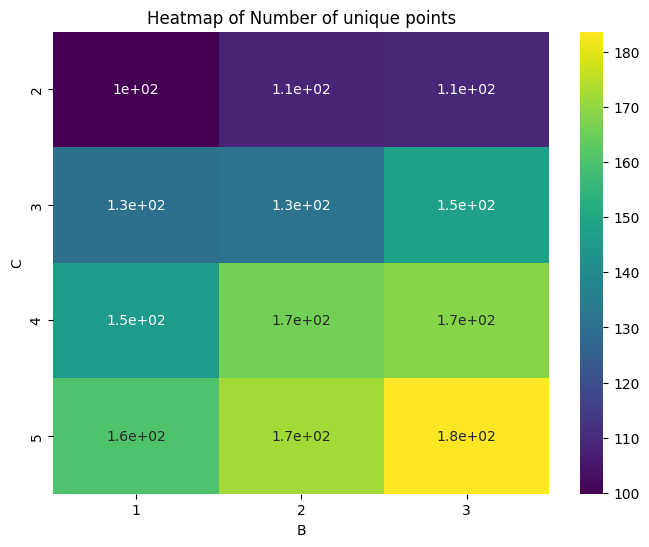

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'x': [...], 'y': [...], 'value': [...]})

# Pivot the DataFrame to get x vs y matrix
heatmap_data = df_grouped_m1_v.pivot(index='c', columns='b', values='total_combined')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # annot=True shows values
plt.title("Heatmap of Number of unique points")
plt.xlabel("B")
plt.ylabel("C")
plt.show()


In [12]:
import pandas as pd
df = pd.read_csv("/Users/mihajlobulesnij/Documents/system/RAI/project/DRL_DGM/model_results/input_output2.csv")

In [13]:
df[["c", "r", "b", "data_seed"]] = df["experiment_path"].str.split("_", expand=True)

In [11]:
df = df.groupby("r").model_1_violation.mean()

In [6]:
df_grouped_m1_v = df.groupby(["c", "b"]).model_1_violation.mean().reset_index()
df_grouped_m2_v = df.groupby(["c", "b"]).model_2_violation.mean().reset_index()

df_grouped_m1_h = df.groupby(["c","b"]).model1_hamming.mean().reset_index()
df_grouped_m2_h = df.groupby(["c", "b"]).model2_hamming.mean().reset_index()


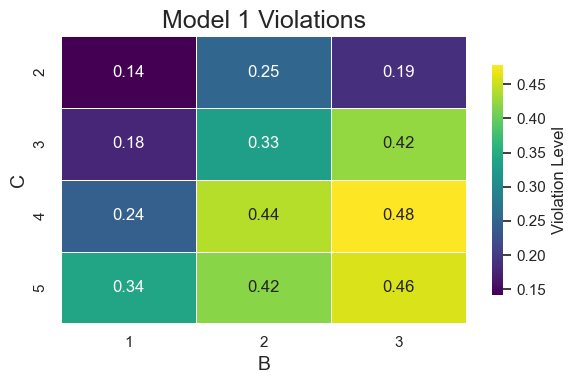

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style (font_scale affects annotations and other elements too)
sns.set_theme(style="white")

# Pivot table for Model 1
heatmap_m1 = df_grouped_m1_v.pivot(index='c', columns='b', values='model_1_violation')

# Smaller plot
plt.figure(figsize=(6, 4))  # smaller figure

sns.heatmap(
    heatmap_m1,
    cmap="viridis",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Violation Level"}
)

# Larger axis labels
plt.title("Model 1 Violations", fontsize=18)
plt.xlabel("B", fontsize=14)
plt.ylabel("C", fontsize=14)

plt.tight_layout()
plt.show()


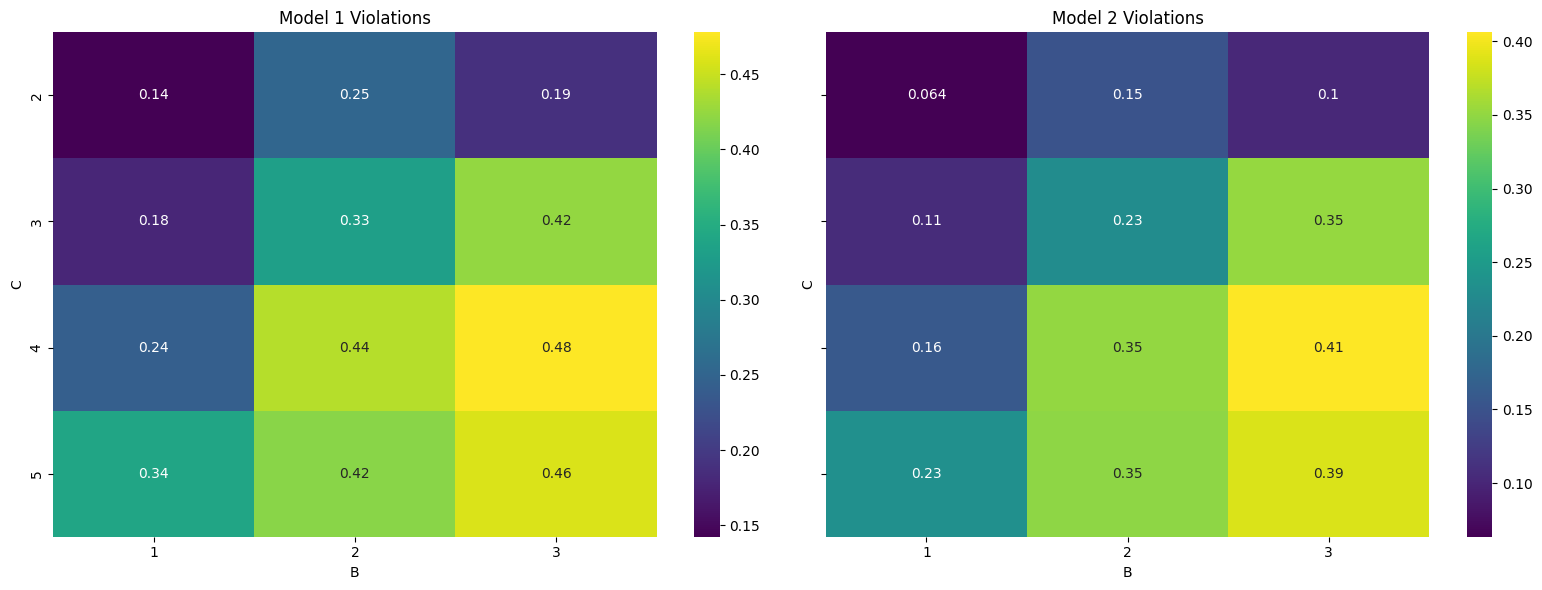

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for Model 1
heatmap_m1 = df_grouped_m1_v.pivot(index='c', columns='b', values='model_1_violation')

# Pivot for Model 2
heatmap_m2 = df_grouped_m2_v.pivot(index='c', columns='b', values='model_2_violation')

# Plot both side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

sns.heatmap(heatmap_m1, cmap='viridis', annot=True, ax=axes[0])
axes[0].set_title("Model 1 Violations")
axes[0].set_xlabel("B")
axes[0].set_ylabel("C")

sns.heatmap(heatmap_m2, cmap='viridis', annot=True, ax=axes[1])
axes[1].set_title("Model 2 Violations")
axes[1].set_xlabel("B")
axes[1].set_ylabel("C")

plt.tight_layout()
plt.show()


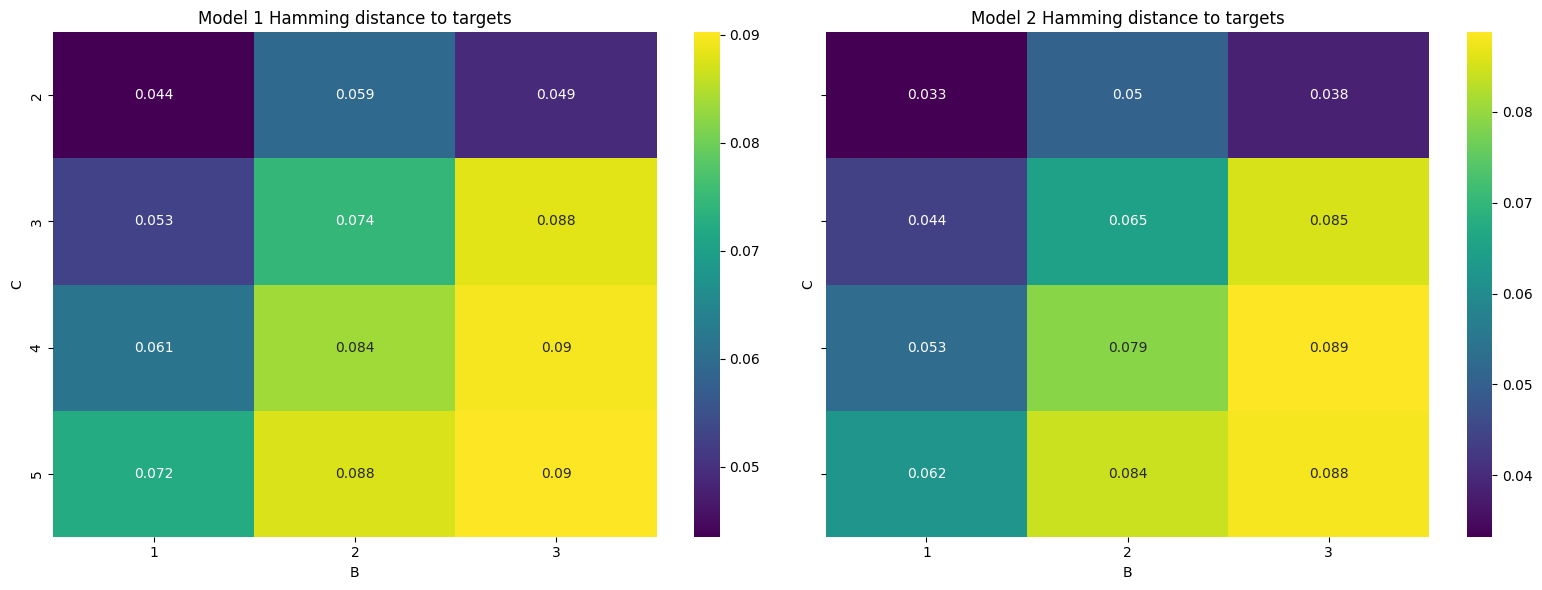

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot for Model 1
heatmap_m1 = df_grouped_m1_h.pivot(index='c', columns='b', values='model1_hamming')

# Pivot for Model 2
heatmap_m2 = df_grouped_m2_h.pivot(index='c', columns='b', values='model2_hamming')

# Plot both side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True, sharey=True)

sns.heatmap(heatmap_m1, cmap='viridis', annot=True, ax=axes[0])
axes[0].set_title("Model 1 Hamming distance to targets")
axes[0].set_xlabel("B")
axes[0].set_ylabel("C")

sns.heatmap(heatmap_m2, cmap='viridis', annot=True, ax=axes[1])
axes[1].set_title("Model 2 Hamming distance to targets")
axes[1].set_xlabel("B")
axes[1].set_ylabel("C")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'x': [...], 'y': [...], 'value': [...]})

# Pivot the DataFrame to get x vs y matrix
heatmap_data = df_grouped_m1_v.pivot(index='c', columns='b', values='model_1_violation')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # annot=True shows values
plt.title("Heatmap of Number of unique points")
plt.xlabel("B")
plt.ylabel("C")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'x': [...], 'y': [...], 'value': [...]})

# Pivot the DataFrame to get x vs y matrix
heatmap_data = df_grouped_m2_v.pivot(index='c', columns='b', values='model_2_violation')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # annot=True shows values
plt.title("Heatmap of Number of unique points")
plt.xlabel("B")
plt.ylabel("C")
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
# df = pd.DataFrame({'x': [...], 'y': [...], 'value': [...]})

# Pivot the DataFrame to get x vs y matrix
heatmap_data = df_grouped_m2_h.pivot(index='c', columns='b', values='model2_hamming')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, cmap='viridis', annot=True)  # annot=True shows values
plt.title("Heatmap of Number of unique points")
plt.xlabel("B")
plt.ylabel("C")
plt.show()
